<a href="https://colab.research.google.com/github/patowari/BgRemove/blob/main/RemoveBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rembg pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime
!pip install rembg pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime
!pip install rembg
!pip install pillow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving your_photo.jpg to your_photo (1).jpg


In [ ]:
from rembg import remove
from google.colab import files

# Get the uploaded filename
filename = list(uploaded.keys())[0]
input_path = f"/content/{filename}"
output_path = f"/content/no_bg_{filename}"

# Remove background
with open(input_path, 'rb') as f:
    input_data = f.read()

output_data = remove(input_data)

with open(output_path, 'wb') as f:
    f.write(output_data)

# Download the result
files.download(output_path)
print("✅ Background removed and downloaded!")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 116GB/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Background removed and downloaded!


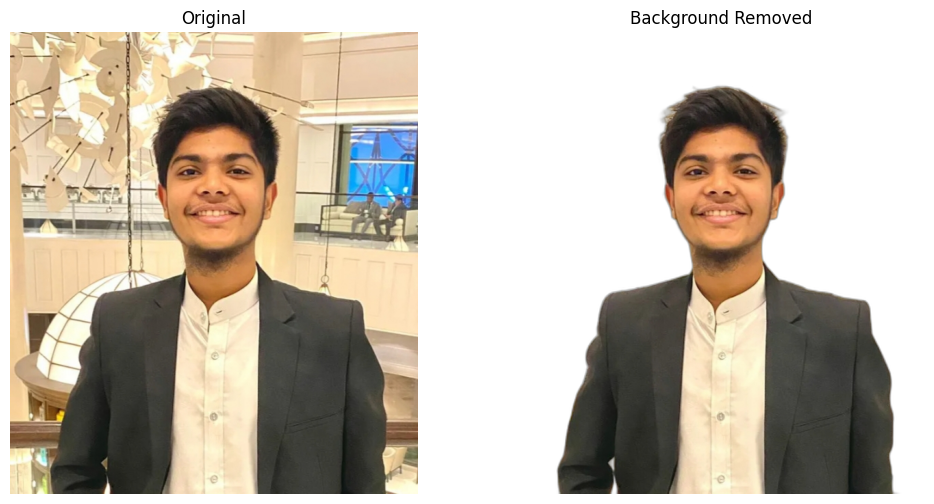

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original
original = Image.open(input_path)
ax1.imshow(original)
ax1.set_title('Original')
ax1.axis('off')

# Processed
processed = Image.open(output_path)
ax2.imshow(processed)
ax2.set_title('Background Removed')
ax2.axis('off')

plt.show()

In [ ]:
!pip install onnxruntime rembg pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
main_image = files.upload()
main_filename = list(main_image.keys())[0]

Saving Picture.jpeg to Picture.jpeg


In [ ]:
print("Select all 7 background images at once:")
background_images = files.upload()
background_filenames = list(background_images.keys())

Select all 7 background images at once:


Saving background_2.png to background_2.png


In [ ]:
from rembg import remove
from PIL import Image
import os

# Remove background from main image
with open(f'/content/{main_filename}', 'rb') as f:
    input_data = f.read()

output_data = remove(input_data)
with open('/content/subject_no_bg.png', 'wb') as f:
    f.write(output_data)

# Load transparent subject
subject = Image.open('/content/subject_no_bg.png').convert("RGBA")

# Create folder for results
os.makedirs('/content/results', exist_ok=True)

# Process each background
for i, bg_filename in enumerate(background_filenames, 1):
    # Load background
    background = Image.open(f'/content/{bg_filename}').convert("RGBA")

    # Resize background to match subject
    background = background.resize(subject.size, Image.Resampling.LANCZOS)

    # Combine images
    result = Image.alpha_composite(background, subject)

    # Save result
    result_path = f'/content/results/final_{i:02d}_{bg_filename}'
    result.convert("RGB").save(result_path, quality=95)

    print(f"✅ Created: final_{i:02d}_{bg_filename}")

print("🎉 All composites created!")

# Download all results
for filename in os.listdir('/content/results'):
    files.download(f'/content/results/{filename}')

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 165GB/s]


✅ Created: final_01_background_2.png
🎉 All composites created!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>